# 二维模型插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter

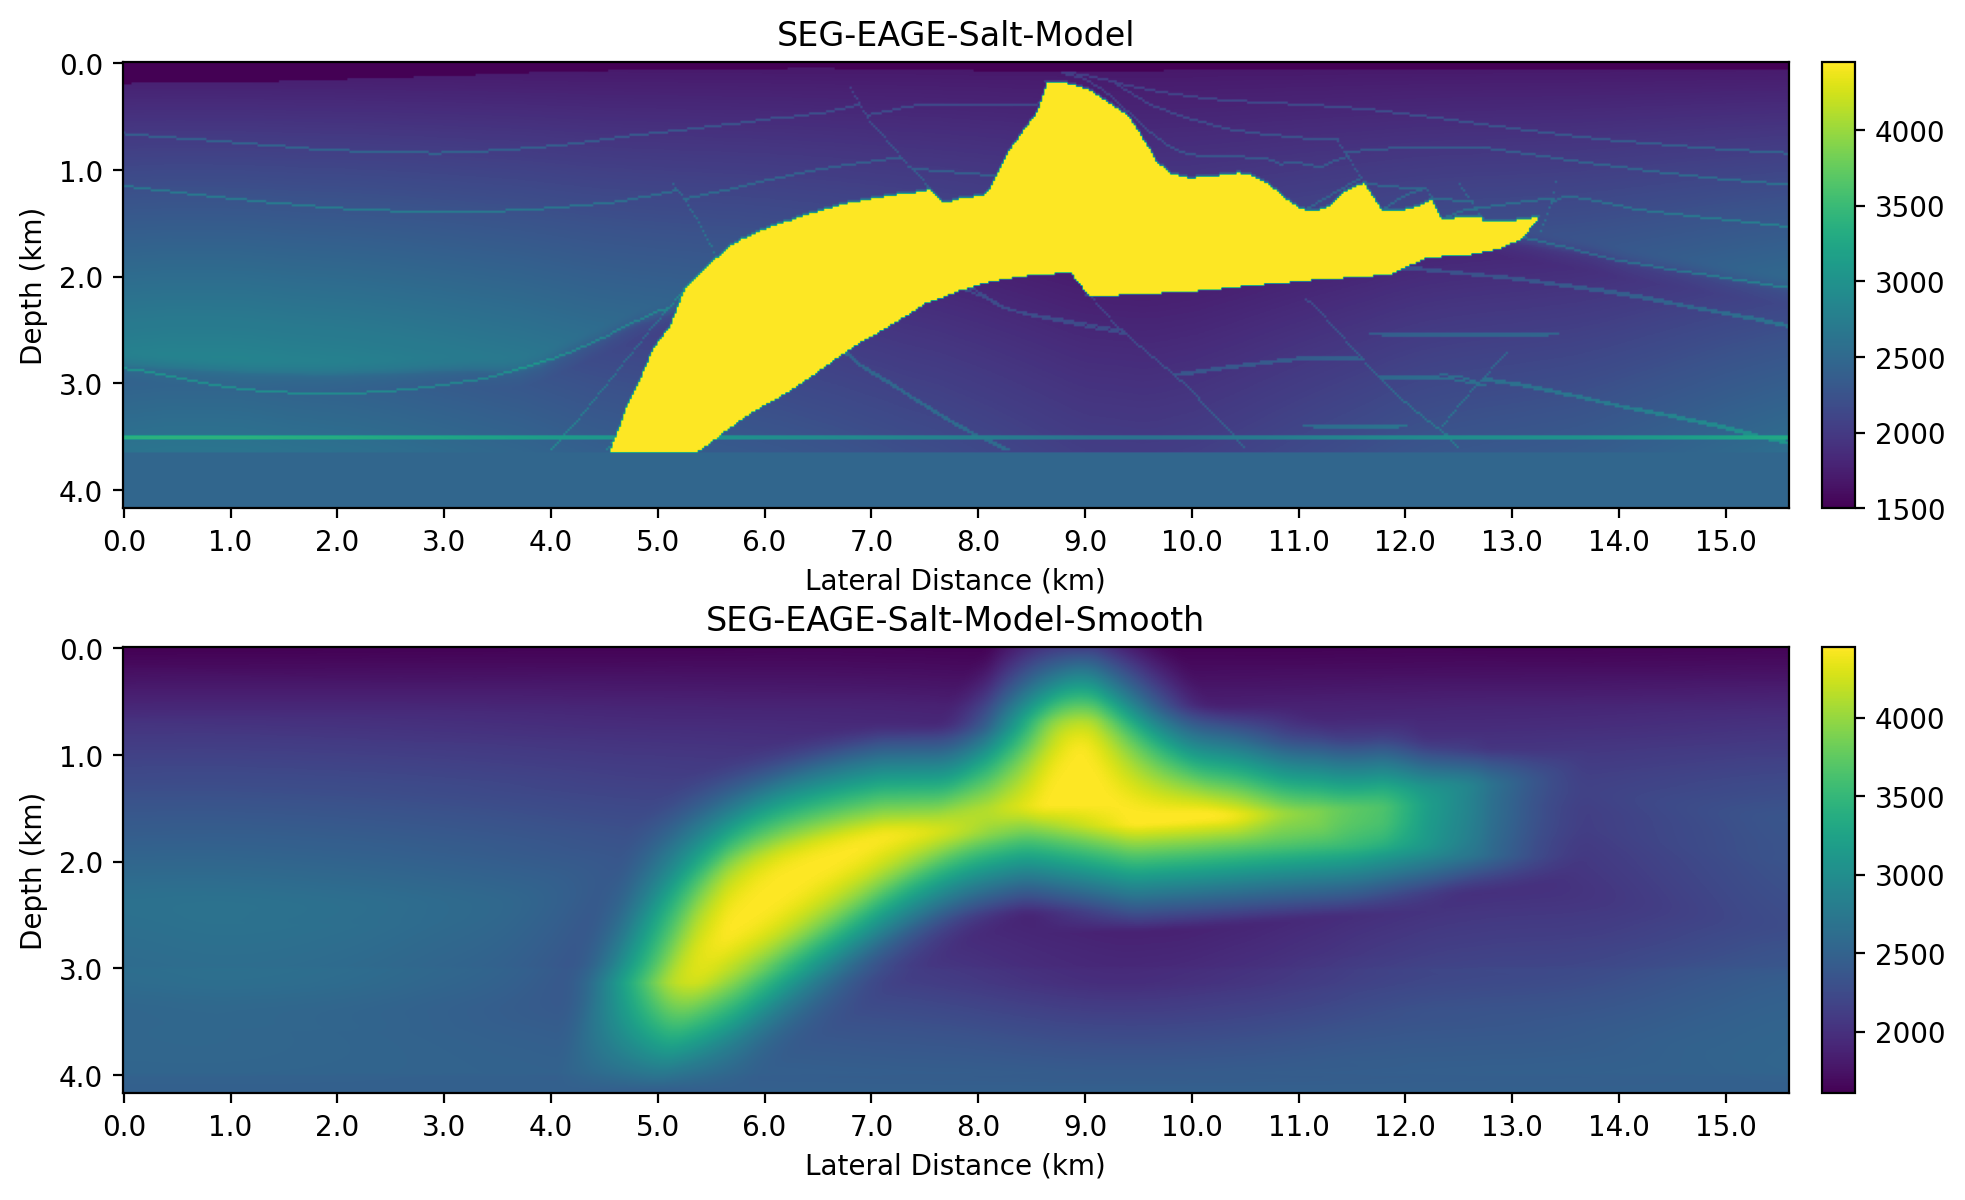

In [14]:
vel=np.load('./SEG-Salt-3D-Model-2D-Sclice-aa.npy')
fig=plt.figure(figsize=(10,6),dpi=200)
ax1=fig.add_subplot(2,1,1)
im1=ax1.imshow(vel)
ax_divider1=make_axes_locatable(ax1)
cax1=ax_divider1.append_axes('right',size='2%',pad='2%')
ax1.set_xticks(np.linspace(0,750,16),np.round(np.linspace(0,15,16),2))
ax1.set_yticks(np.linspace(0,200,5),np.round(np.linspace(0,4,5)))
ax1.set_xlabel('Lateral Distance (km)')
ax1.set_ylabel('Depth (km)')
ax1.set_title('SEG-EAGE-Salt-Model')
fig.colorbar(im1,cax=cax1)
vel.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-20m-{vel.shape[0]}-{vel.shape[1]}.bin')
vel_smooth=savgol_filter(vel,50,1,axis=0,mode='nearest')
vel_smooth=savgol_filter(vel_smooth,50,1,axis=1,mode='nearest')
vel_smooth.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-20m-{vel.shape[0]}-{vel.shape[1]}-smooth.bin')
ax2=fig.add_subplot(2,1,2)
im2=ax2.imshow(vel_smooth)
ax2.set_xticks(np.linspace(0,750,16),np.round(np.linspace(0,15,16),2))
ax2.set_yticks(np.linspace(0,200,5),np.round(np.linspace(0,4,5)))
ax2.set_xlabel('Lateral Distance (km)')
ax2.set_ylabel('Depth (km)')
ax2.set_title('SEG-EAGE-Salt-Model-Smooth')
ax_divider2=make_axes_locatable(ax2)
cax2=ax_divider2.append_axes('right',size='2%',pad='2%')
fig.colorbar(im2,cax=cax2)
fig.tight_layout()
fig.savefig('SEG-EAGE-Salt-Model.png')

In [25]:
dx=20
nz=vel.shape[0]
nx=vel.shape[1]
zlenth=(nz-1)*dx
xlenth=(nx-1)*dx
z=np.linspace(0,zlenth,nz)
x=np.linspace(0,xlenth,nx)
zg,xg=np.meshgrid(z,x,indexing='ij')
interp=RegularGridInterpolator((z,x),vel,method='linear')

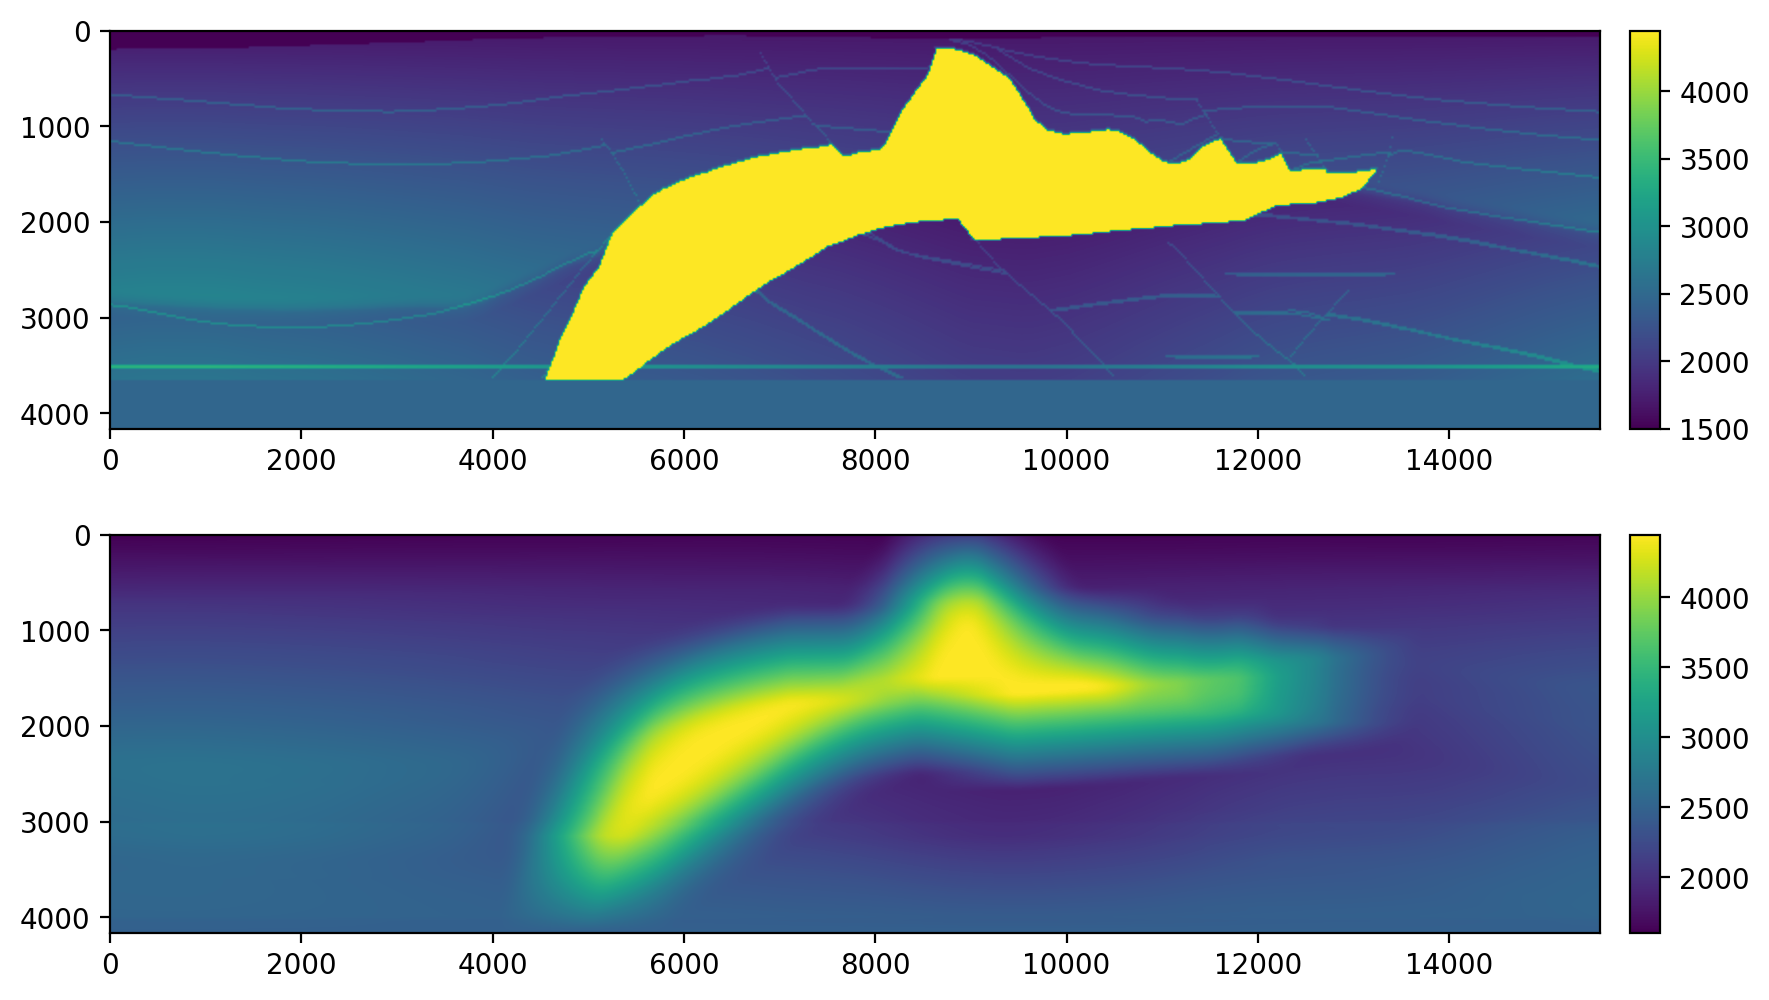

In [26]:
dx_interp=1
nz_interp=int(zlenth/dx_interp)+1
nx_interp=int(xlenth/dx_interp)+1
zp=np.linspace(0,zlenth,nz_interp)
xp=np.linspace(0,xlenth,nx_interp)
zpg,xpg=np.meshgrid(zp,xp,indexing='ij')
vel_interp=interp((zpg,xpg))
fig=plt.figure(figsize=(10,6),dpi=200)
ax1=fig.add_subplot(2,1,1)
im1=ax1.imshow(vel_interp)
ax_divider1=make_axes_locatable(ax1)
cax1=ax_divider1.append_axes('right',size='2%',pad='2%')
fig.colorbar(im1,cax=cax1)
np.save(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}',vel_interp)
np.savetxt(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.csv',vel_interp)
vel_interp.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.bin')
vel_interp_smooth=savgol_filter(vel_interp,1000,1,axis=0,mode='nearest')
vel_interp_smooth=savgol_filter(vel_interp_smooth,1000,1,axis=1,mode='nearest')
ax2=fig.add_subplot(2,1,2)
im2=ax2.imshow(vel_interp_smooth)
ax_divider2=make_axes_locatable(ax2)
cax2=ax_divider2.append_axes('right',size='2%',pad='2%')
fig.colorbar(im2,cax=cax2)
vel_interp_smooth.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}-smooth.bin')

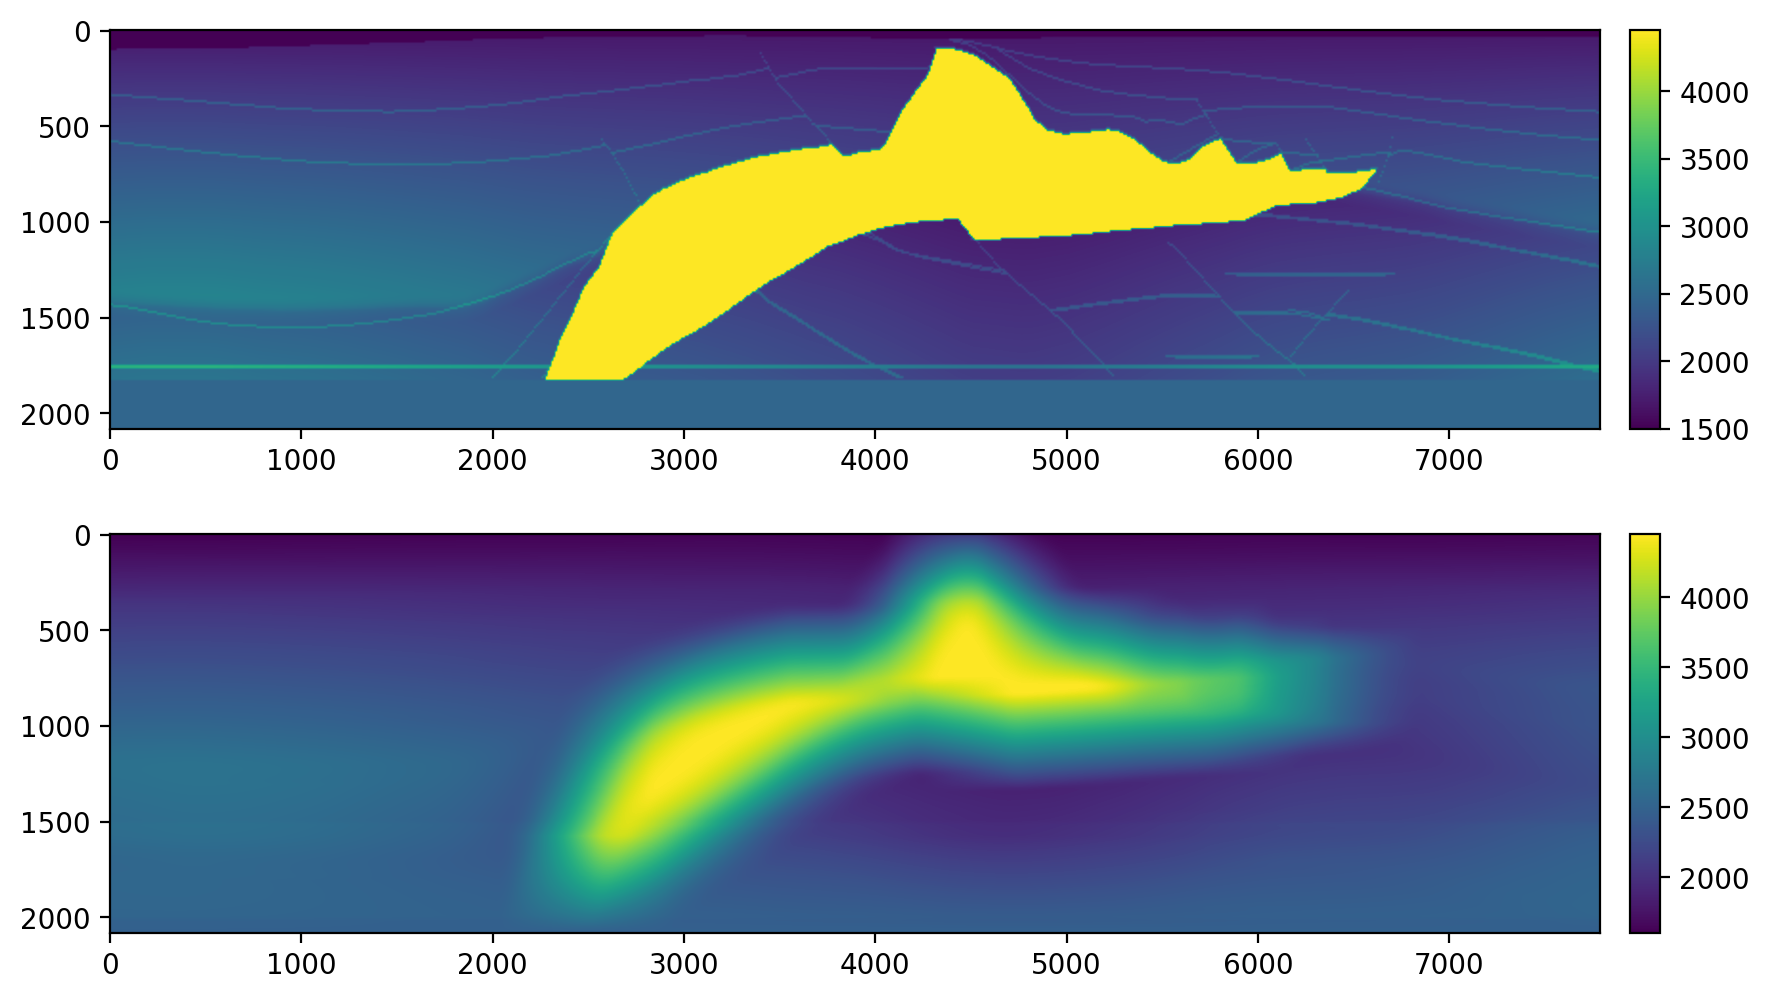

In [27]:
dx_interp=2
nz_interp=int(zlenth/dx_interp)+1
nx_interp=int(xlenth/dx_interp)+1
zp=np.linspace(0,zlenth,nz_interp)
xp=np.linspace(0,xlenth,nx_interp)
zpg,xpg=np.meshgrid(zp,xp,indexing='ij')
vel_interp=interp((zpg,xpg))
fig=plt.figure(figsize=(10,6),dpi=200)
ax1=fig.add_subplot(2,1,1)
im1=ax1.imshow(vel_interp)
ax_divider1=make_axes_locatable(ax1)
cax1=ax_divider1.append_axes('right',size='2%',pad='2%')
fig.colorbar(im1,cax=cax1)
np.save(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}',vel_interp)
np.savetxt(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.csv',vel_interp)
vel_interp.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.bin')
vel_interp_smooth=savgol_filter(vel_interp,500,1,axis=0,mode='nearest')
vel_interp_smooth=savgol_filter(vel_interp_smooth,500,1,axis=1,mode='nearest')
ax2=fig.add_subplot(2,1,2)
im2=ax2.imshow(vel_interp_smooth)
ax_divider2=make_axes_locatable(ax2)
cax2=ax_divider2.append_axes('right',size='2%',pad='2%')
fig.colorbar(im2,cax=cax2)
vel_interp_smooth.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}-smooth.bin')

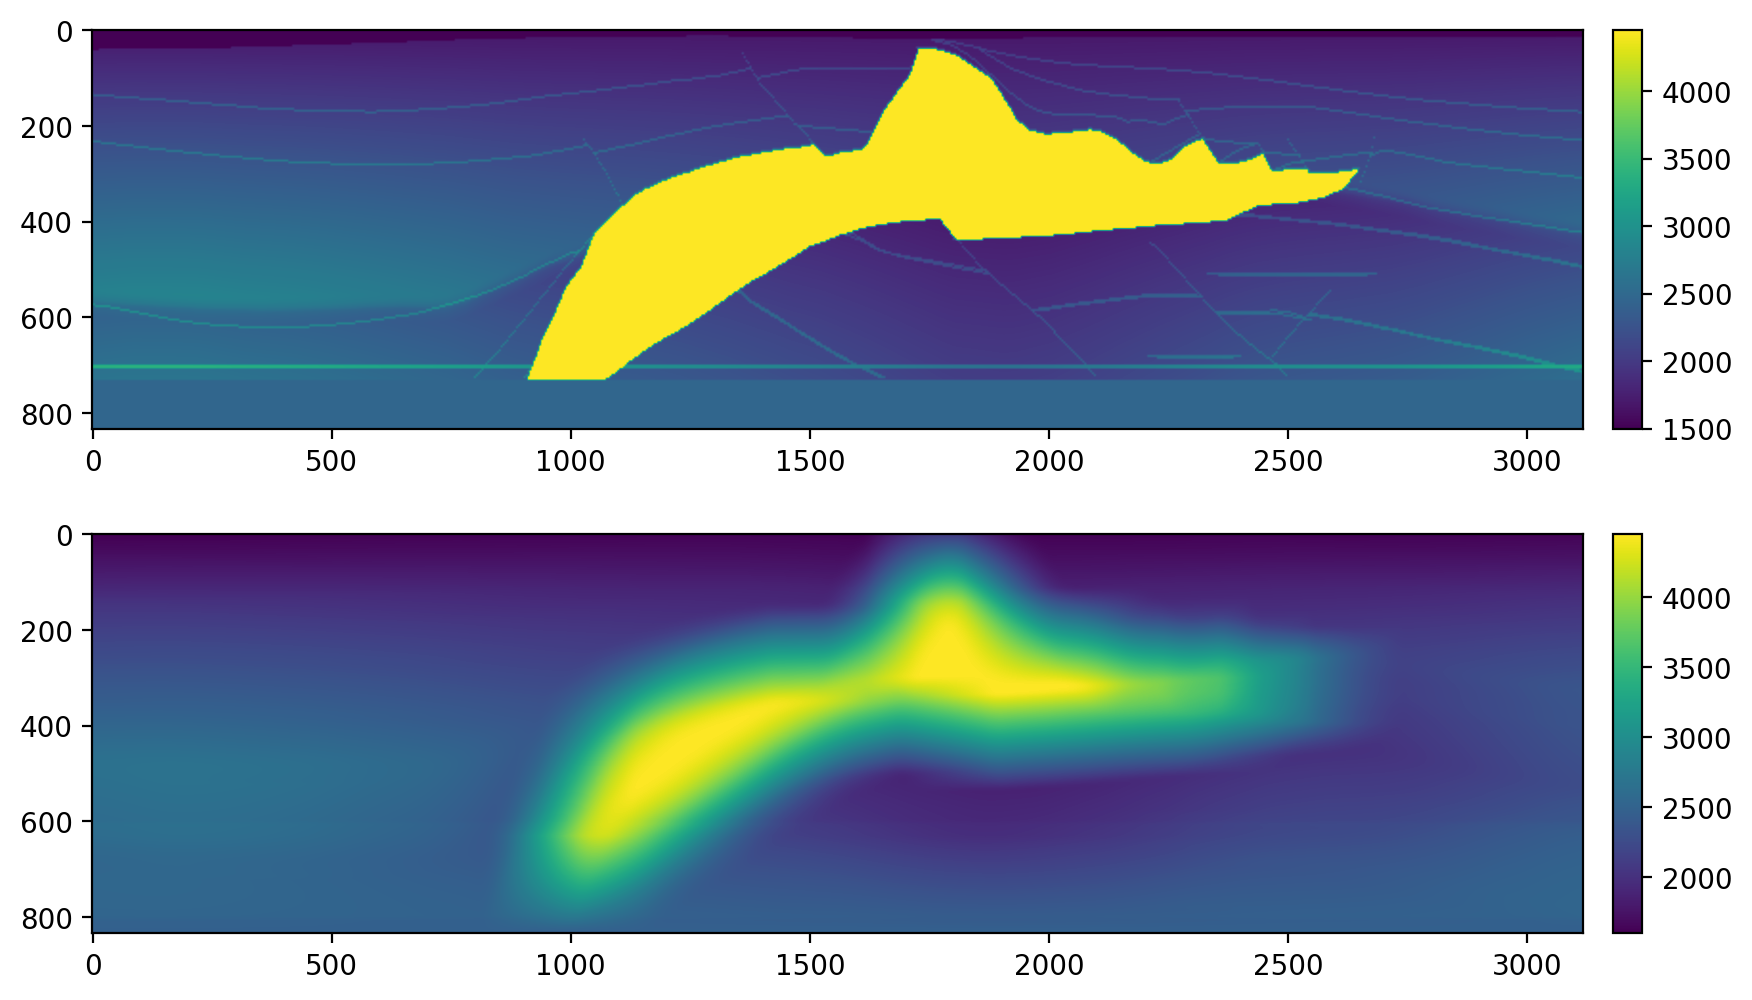

In [28]:
dx_interp=5
nz_interp=int(zlenth/dx_interp)+1
nx_interp=int(xlenth/dx_interp)+1
zp=np.linspace(0,zlenth,nz_interp)
xp=np.linspace(0,xlenth,nx_interp)
zpg,xpg=np.meshgrid(zp,xp,indexing='ij')
vel_interp=interp((zpg,xpg))
fig=plt.figure(figsize=(10,6),dpi=200)
ax1=fig.add_subplot(2,1,1)
im1=ax1.imshow(vel_interp)
ax_divider1=make_axes_locatable(ax1)
cax1=ax_divider1.append_axes('right',size='2%',pad='2%')
fig.colorbar(im1,cax=cax1)
np.save(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}',vel_interp)
np.savetxt(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.csv',vel_interp)
vel_interp.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.bin')
vel_interp_smooth=savgol_filter(vel_interp,200,1,axis=0,mode='nearest')
vel_interp_smooth=savgol_filter(vel_interp_smooth,200,1,axis=1,mode='nearest')
ax2=fig.add_subplot(2,1,2)
im2=ax2.imshow(vel_interp_smooth)
ax_divider2=make_axes_locatable(ax2)
cax2=ax_divider2.append_axes('right',size='2%',pad='2%')
fig.colorbar(im2,cax=cax2)
vel_interp_smooth.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}-smooth.bin')

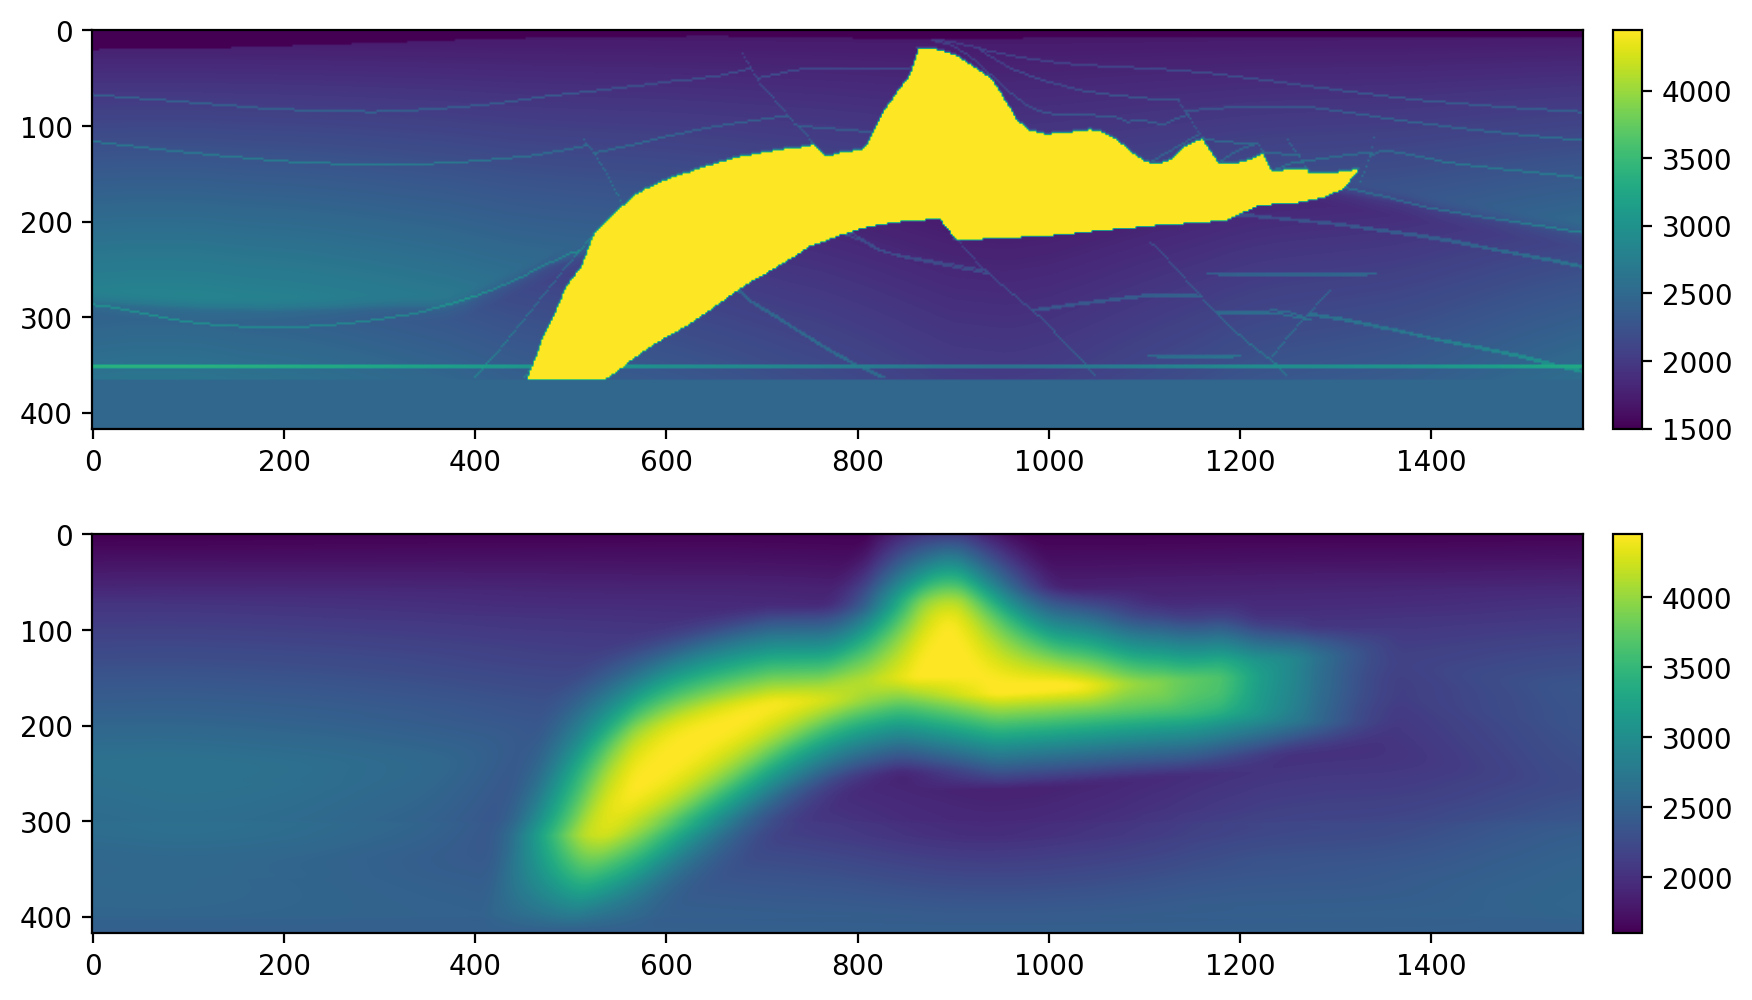

In [29]:
dx_interp=10
nz_interp=int(zlenth/dx_interp)+1
nx_interp=int(xlenth/dx_interp)+1
zp=np.linspace(0,zlenth,nz_interp)
xp=np.linspace(0,xlenth,nx_interp)
zpg,xpg=np.meshgrid(zp,xp,indexing='ij')
vel_interp=interp((zpg,xpg))
fig=plt.figure(figsize=(10,6),dpi=200)
ax1=fig.add_subplot(2,1,1)
im1=ax1.imshow(vel_interp)
ax_divider1=make_axes_locatable(ax1)
cax1=ax_divider1.append_axes('right',size='2%',pad='2%')
fig.colorbar(im1,cax=cax1)
np.save(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}',vel_interp)
np.savetxt(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.csv',vel_interp)
vel_interp.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}.bin')
vel_interp_smooth=savgol_filter(vel_interp,100,1,axis=0,mode='nearest')
vel_interp_smooth=savgol_filter(vel_interp_smooth,100,1,axis=1,mode='nearest')
ax2=fig.add_subplot(2,1,2)
im2=ax2.imshow(vel_interp_smooth)
ax_divider2=make_axes_locatable(ax2)
cax2=ax_divider2.append_axes('right',size='2%',pad='2%')
fig.colorbar(im2,cax=cax2)
vel_interp_smooth.T.astype('float32').tofile(f'SEG-Salt-3D-Model-2D-Sclice-aa-interp-{dx_interp}m-{vel_interp.shape[0]}-{vel_interp.shape[1]}-smooth.bin')